## Transform Kaggle to resemble MNIST

In [20]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt


2022-11-25 02:11:40.651270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



----------------Contoured Image--------------------


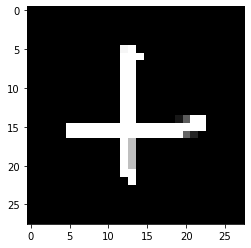

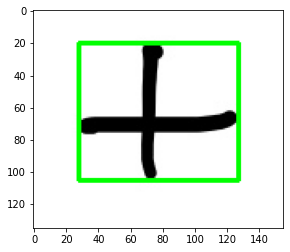

In [85]:
image = cv2.imread('/Users/davidperez/Documents/GitHub/ideal-funicular/datasets/kaggle_dataset/23.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

plt.imshow(preprocessed_digits[0], cmap="gray")
plt.show()
plt.imshow(image, cmap="gray")
plt.show()
    



----------------Original Image--------------------


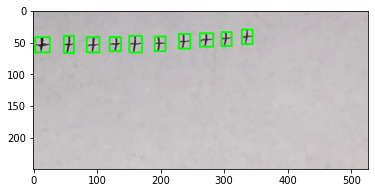

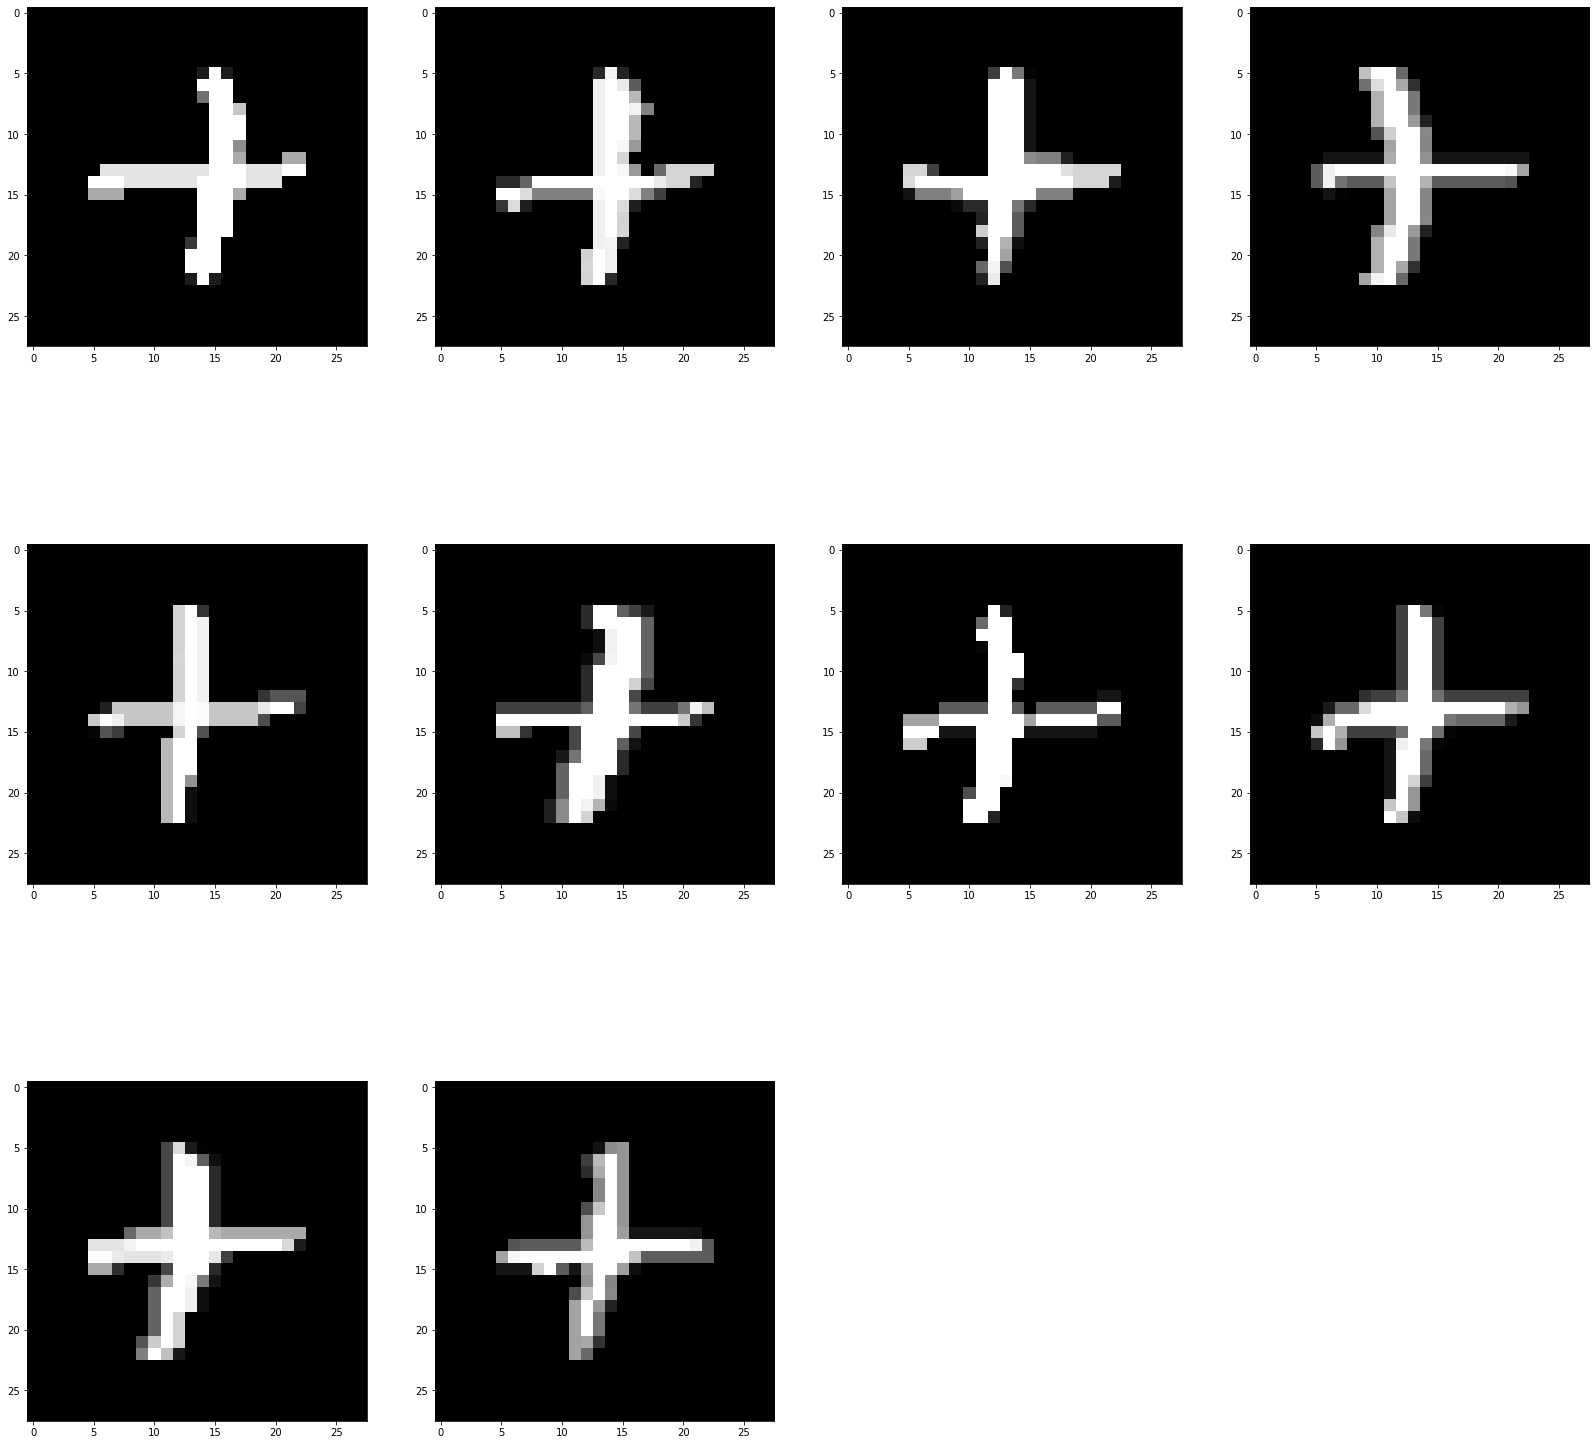

In [121]:
image = cv2.imread('./add_secondSetFlash.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape


    padded_digit = digit.copy()

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Original Image--------------------")
plt.imshow(image)
plt.show()

inp = np.array(preprocessed_digits)

bounded_digit_index = 0

columns = 4
rows = math.ceil( len(preprocessed_digits) / columns)
fig = plt.figure(figsize=(28, 28))

for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))

    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(preprocessed_digits[i - 1], cmap='gray')

    

### Performing Preprocessing For All Images in "add" Directory

DISPLAYING FIRST 10 DIGITS


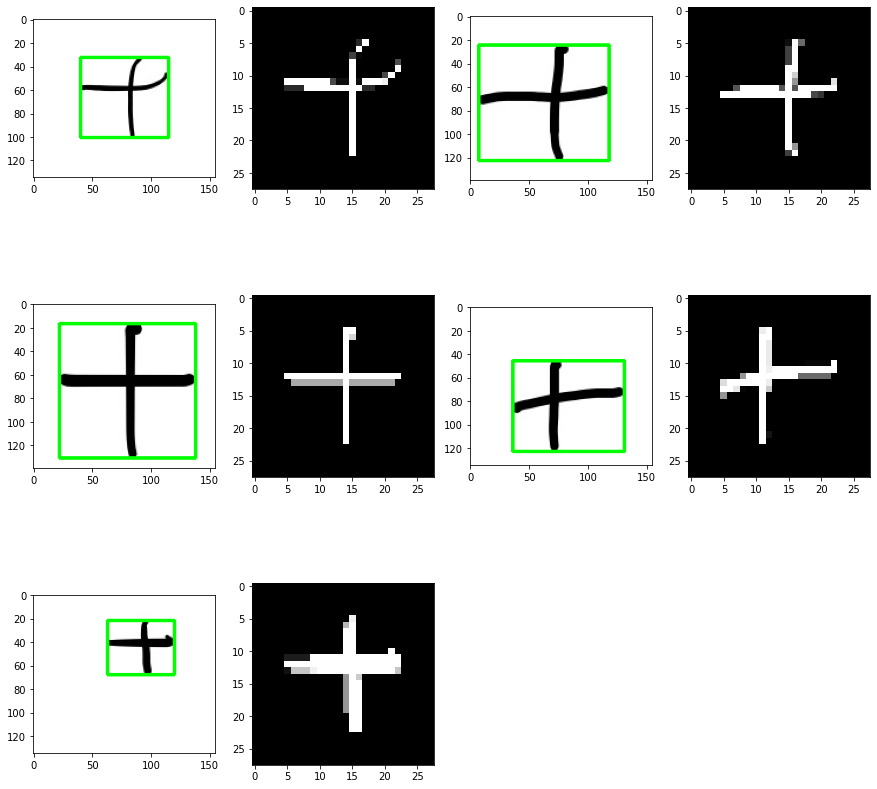

In [34]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math

def save_img_to_add_preproc_dir(img_name, img):
  add_preproc_path = "./kaggle_dataset/add_preproc/"

  cv2.imwrite(add_preproc_path + img_name, img)


# @@@@@@@@@@@Preprocessing pipeline @@@@@@@@@@@@@@@@@@@@
# Consider adding noise removal: https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python 
def preprocess_pipeline(img):

  # Create Grayscale Copy and apply contours
  grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  bounded_img = None
  processed_digit = None

  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Save copy of bounded image
    bounded_img = img
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape

    padded_digit = digit.copy() # WHY THIS HERE

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Update image argument with processed form
    processed_digit = padded_digit

  return bounded_img, processed_digit

def display_list_of_images(images_list):
  columns = 4

  # if less than 10 images doesn't seem to print correctly
  rows = math.ceil( len(images_list) / columns)

  fig = plt.figure(figsize=(15,15))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')



# BEGGINNING OF MAIN SCRIPT

# Get list of all file names of images in kaggle_dataset/add
# @todo Make the listings be in ascending order
image_names = os.listdir("./kaggle_dataset/add")
# image_names.sort(key=lambda f: int(filter(str.isdigit, f)))

preproc_digits = []
boundeds = []
# perform 
for i in range(0,len(image_names)):
  image = cv2.imread("./kaggle_dataset/add/" + image_names[i])

  # Creates copy of image then preprocesses copy
  bounded_img, preproc_img = preprocess_pipeline(image)

  preproc_digits.append(bounded_img)
  preproc_digits.append(preproc_img)

  # Save preproc image to new folder
  save_img_to_add_preproc_dir(image_names[i],  preproc_img)

# DISPLAYING IMAGES TO SEE OPERATION maybe display first 8?
num_digits_display = 10
print(f"DISPLAYING FIRST {num_digits_display} DIGITS")
first_ten_digits = preproc_digits[:num_digits_display]
display_list_of_images(first_ten_digits)

## Create Rotations for for kaggle_dataset/add_preproc

DISPLAYING FIRST ROTATE_90_CLOCKWISE DIGITS
DISPLAYING FIRST ROTATE_180 DIGITS
DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS


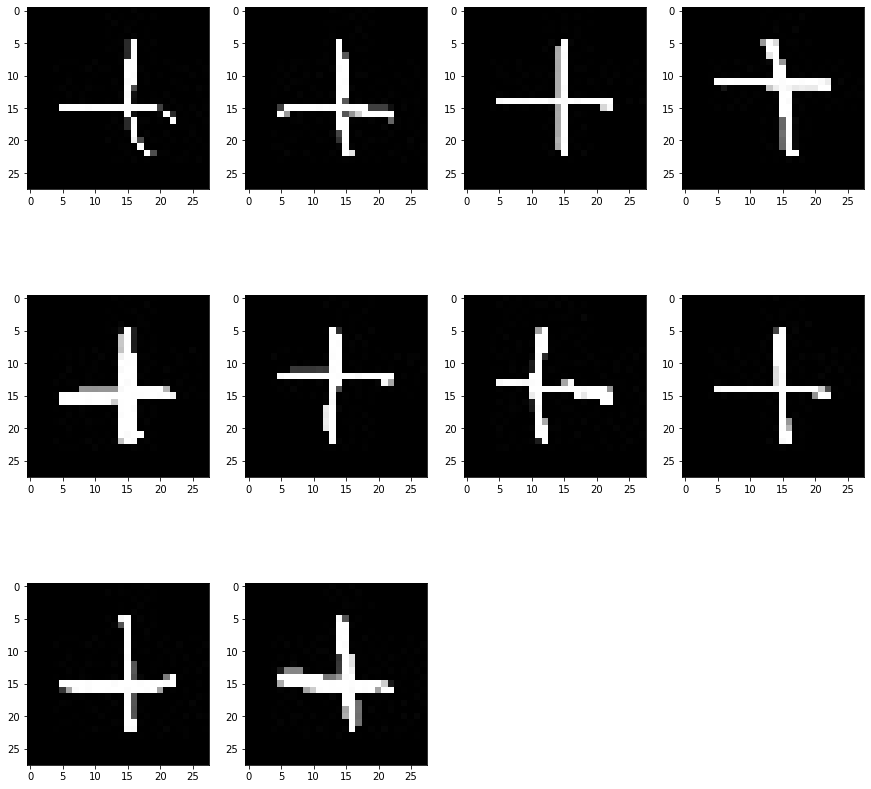

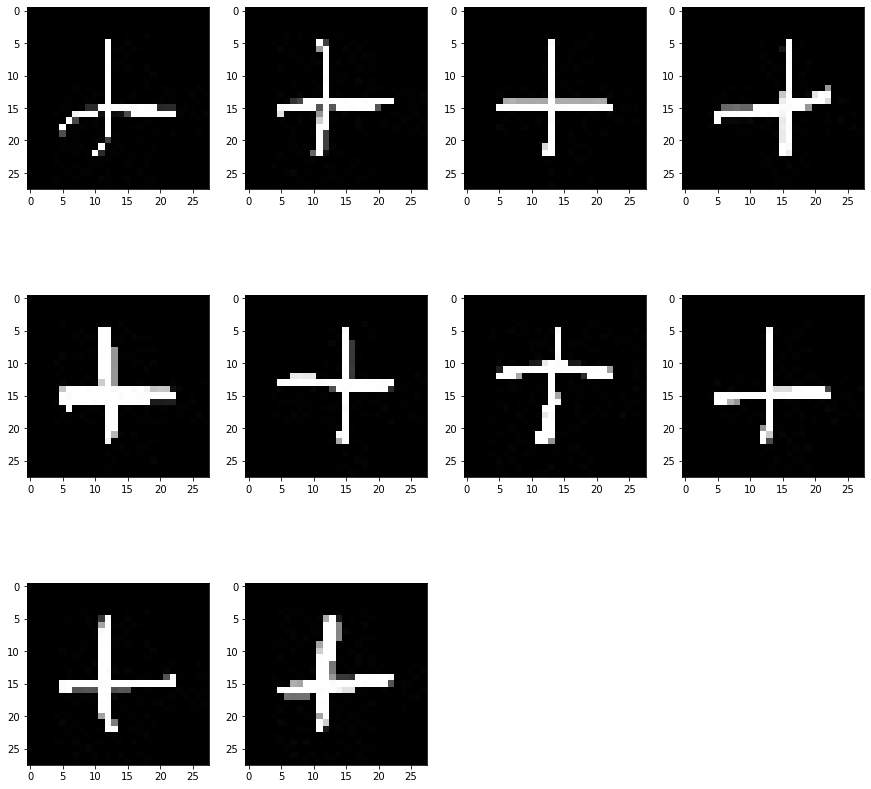

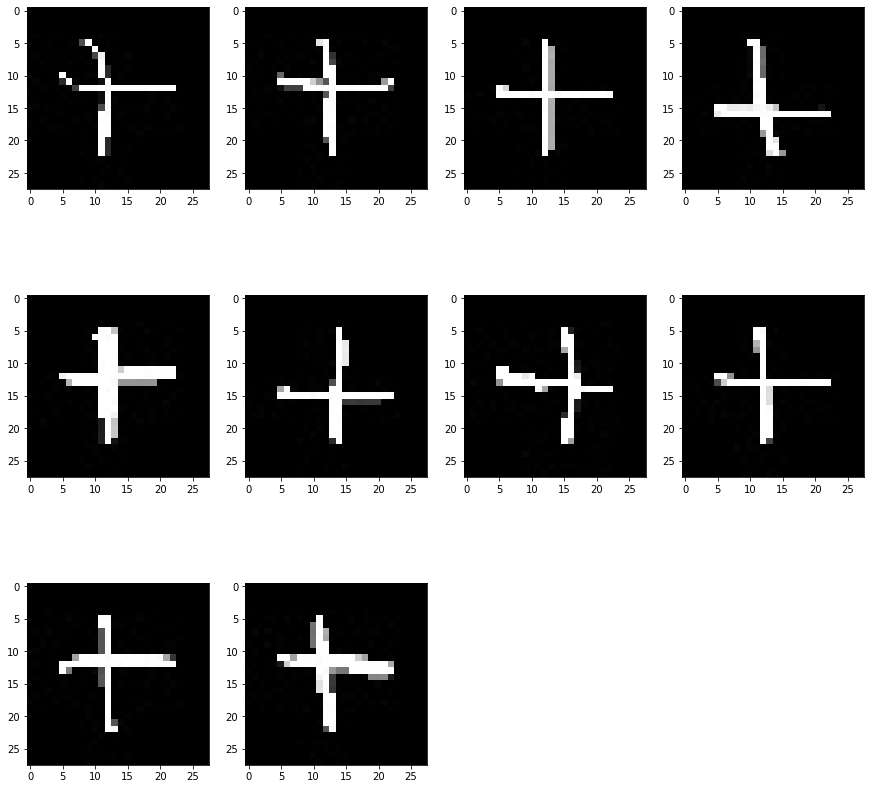

In [21]:
import os
import cv2
import math
import os
import numpy as np
import matplotlib.pyplot as plt

# Copy from before
def display_list_of_images(images_list):
  columns = 4

  # if less than 10 images doesn't seem to print correctly
  rows = math.ceil( len(images_list) / columns)

  fig = plt.figure(figsize=(15, 15))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')


# Save list of images to a specific folder
# DOUBLE CHECK THIS METHOD BEFORE RUNNING AGAIN
# maybe do read, rotate save images
def read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
  image_file_names = os.listdir(images_folder)

  # Create string of rotation to add to file name
  rotatation_str = ""
  if (rotation == 0):
    rotatation_str = "_c90"
  elif (rotation == 1):
      rotatation_str = "_c180"
  elif (rotation == 2):
      rotatation_str = "_c270"

  # Store 'num_digits_return' to return
  rotated_digits = []

  for i in range(0,len(image_file_names) - 1):
    image = cv2.imread(images_folder+ image_file_names[i])

    # 'rotation' expected is a cv2 rotation which is an int 0-2
    # 0 is clockwise 90 degrees, 1 is 180, 2 is 90 counter clockwise
    rotated_img = cv2.rotate(image, rotation)

    if ( i < num_digits_return):
      rotated_digits.append(rotated_img)

    # Save image as its name plus how its rotated:
    # Remove file type from img name
    image_name = os.path.splitext(image_file_names[i])

    cv2.imwrite(save_path + image_name[0] + rotatation_str +".png", rotated_img)

  if (num_digits_return !=0 ):
    return rotated_digits


# @@@@@@@@@@@@@@@@@@@@@@@@  MAIN  @@@@@@@@@@@@@@@@@@@@@@@@

# @TODO WHY IS IT ONLY DISPLAYING 20 DIGITS, DEBATE NEW PRINTING FORMAT

# Create duplicate rotations of a folder and save rotated images
num_digits_print = 10
rotation_list = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]
rotation_names = ["ROTATE_90_CLOCKWISE", "ROTATE_180", "ROTATE_90_COUNTERCLOCKWISE"]

for rotation in rotation_list:
  # read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
  saved_images = read_rotate_save_images("./kaggle_dataset/add_preproc/",
    "./kaggle_dataset/add_preproc_duplicated/",
      rotation, num_digits_print)

  # Display 20 saved images
  print(f"DISPLAYING FIRST {rotation_names[rotation]} DIGITS")
  display_list_of_images(saved_images)


# Copy the original preprocessed digits into the newly created folder:
image_names = os.listdir("./kaggle_dataset/add_preproc")

for i in range(0,len(image_names)):
  image = cv2.imread("./kaggle_dataset/add_preproc/" + image_names[i])

  cv2.imwrite("./kaggle_dataset/add_preproc_duplicated/" + image_names[i], image)

## Prepcosess for Other Kaggle Dataset
### [Dataset link](https://www.kaggle.com/datasets/michelheusser/handwritten-digits-and-operators?datasetId=763806)

DISPLAYING FIRST 10 DIGITS


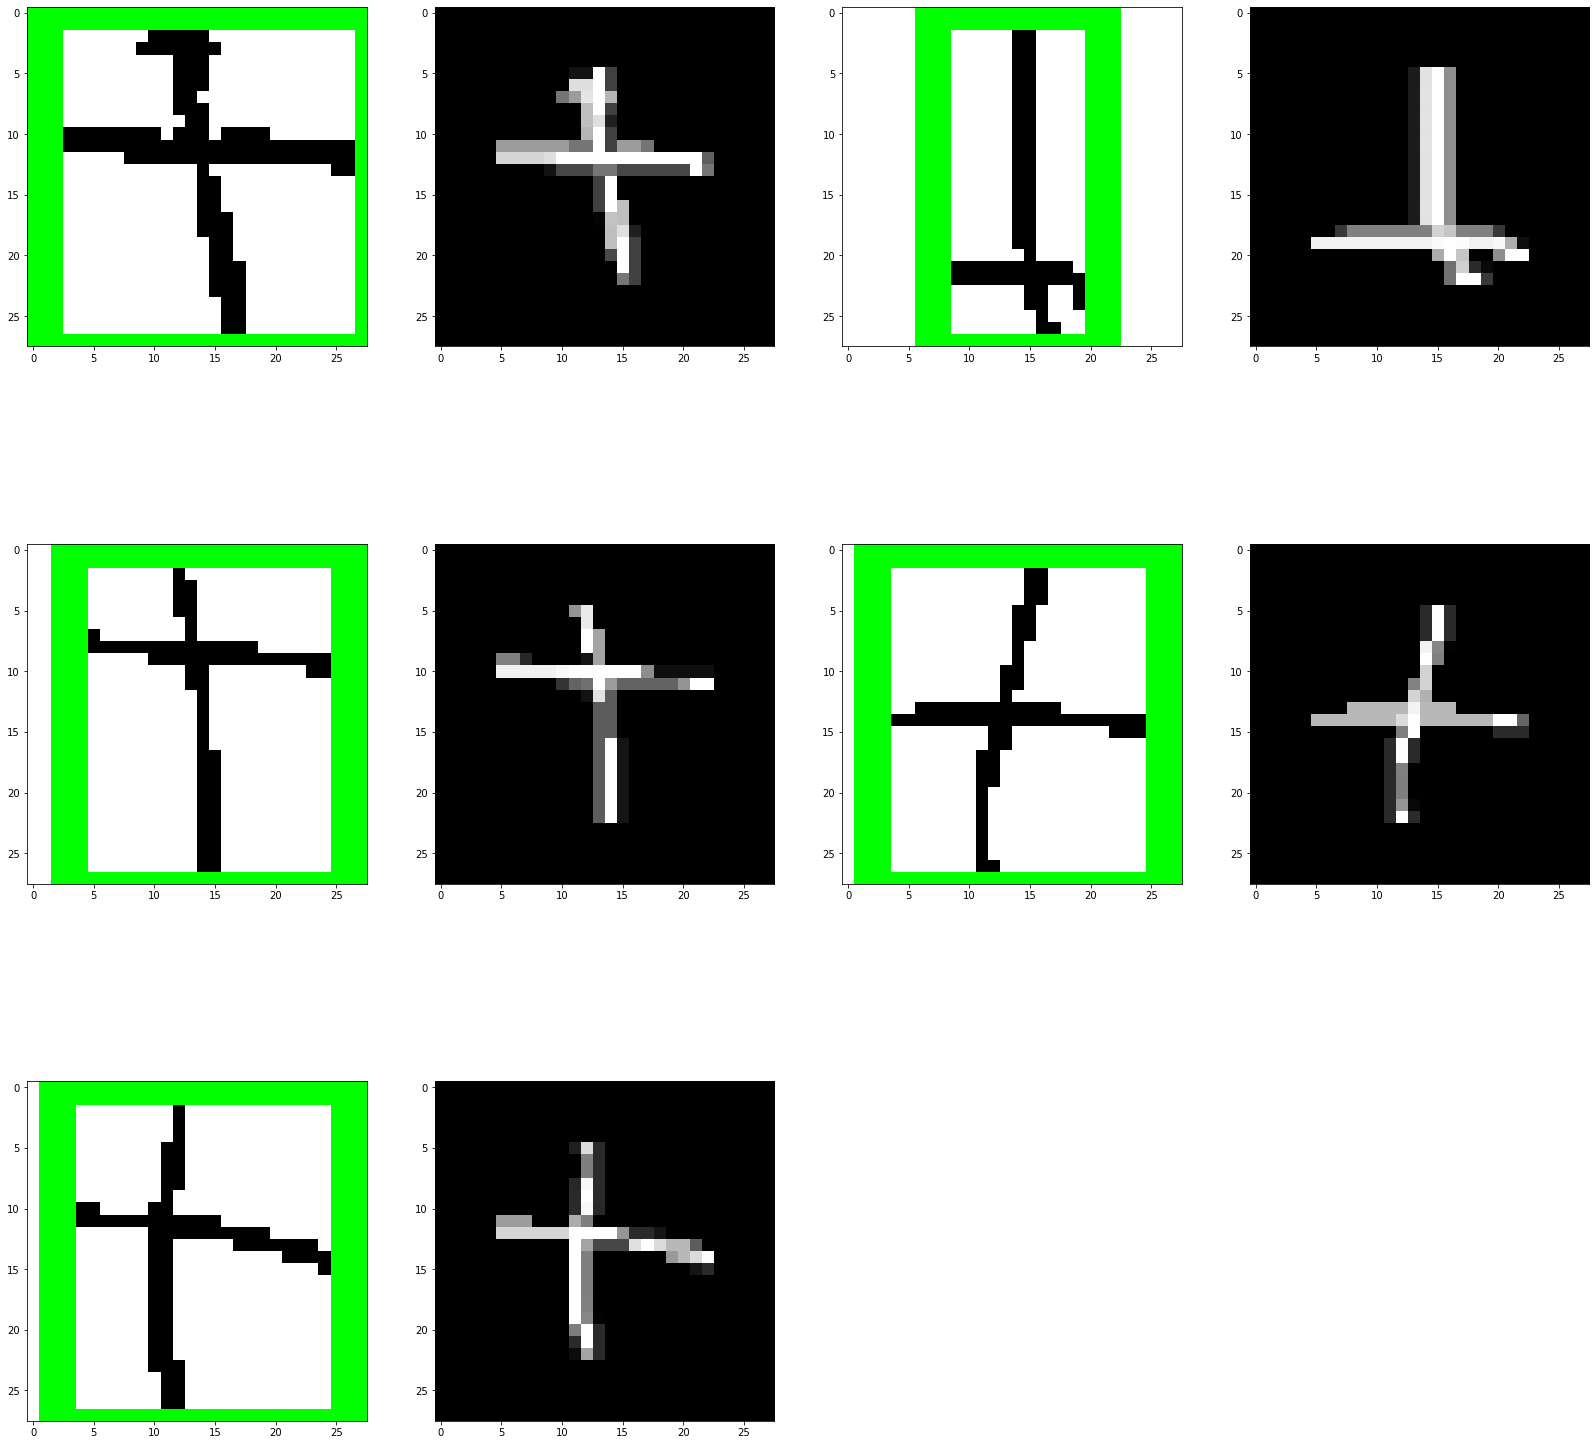

In [10]:
import re
import math
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math

def save_img_to_add_preproc_dir(img_name, img):
  add_preproc_path = "./kaggle_dataset2/digit_original/"

  cv2.imwrite(add_preproc_path + img_name, img)


# @@@@@@@@@@@Preprocessing pipeline @@@@@@@@@@@@@@@@@@@@
# Consider adding noise removal: https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python 
def preprocess_pipeline(img):

  # Create Grayscale Copy and apply contours
  grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  bounded_img = None
  processed_digit = None

  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Save copy of bounded image
    bounded_img = img
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape

    padded_digit = digit.copy() # WHY THIS HERE

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Update image argument with processed form
    processed_digit = padded_digit

  return bounded_img, processed_digit

def display_list_of_images(images_list):
  columns = 4

  # if less than 10 images doesn't seem to print correctly
  rows = math.ceil( len(images_list) / columns)

  fig = plt.figure(figsize=(28, 28))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')





# BEGGINNING OF MAIN SCRIPT

image_names = os.listdir("./kaggle_dataset2/+")

original_digits_names = []
# fix file type extraction
regex_pattern = "[+][_][\d][_][\d]+.png"
for file in image_names:
  match = re.search(regex_pattern, file)

  if match:
    # print("FILE MATCHED: ", file)
    original_digits_names.append(file)

# image_names.sort(key=lambda f: int(filter(str.isdigit, f)))

preproc_digits = []
boundeds = []
# perform 
for i in range(0,len(original_digits_names)):
  image = cv2.imread("./kaggle_dataset2/+/" + original_digits_names[i])

  # Creates copy of image then preprocesses copy
  bounded_img, preproc_img = preprocess_pipeline(image)

  preproc_digits.append(bounded_img)
  preproc_digits.append(preproc_img)

  # Save preproc image to new folder
  save_img_to_add_preproc_dir(original_digits_names[i],  preproc_img)


# DISPLAYING IMAGES TO SEE OPERATION maybe display first 8?
num_digits_display = 10
print(f"DISPLAYING FIRST {num_digits_display} DIGITS")
first_ten_digits = preproc_digits[:num_digits_display]
display_list_of_images(first_ten_digits)


## Rotate Proprocessed Images by 90 Degrees CounterClockwise

In [ ]:
import os
import cv2
import math
import os
import numpy as np
import matplotlib.pyplot as plt

# Copy from before
def display_list_of_images(images_list):
  columns = 4

  # if less than 10 images doesn't seem to print correctly
  rows = math.ceil( len(images_list) / columns)

  fig = plt.figure(figsize=(28, 28))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')




# @@@@@@@@@@@@@@@@@@@@@@@@  MAIN  @@@@@@@@@@@@@@@@@@@@@@@@
# Get preprocessed images:
image_names = os.listdir("./kaggle_dataset2/digit_original")


rotated_digits = []
# for i in range(0, 20):
for i in range(0,len(image_names)):

  # image = cv2.imread("./kaggle_dataset2/digit_original/" + original_digits_names[i])
  image = cv2.imread("./kaggle_dataset2/digit_original/" + image_names[i])

  # Rotate Image by 90 Degrees:
  image_cc90 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
  # image_cc90 = image.rotate(180)

  if ( i < 20):
    rotated_digits.append(image_cc90)

  # Save preproc image to new folder
  path = "./kaggle_dataset2/digit_original_cc90/"
  cv2.imwrite(path + image_names[i]+ "_cc90.png", image_cc90)


# DISPLAYING IMAGES TO SEE OPERATION maybe display first 8?
num_digits_display = 20
print(f"DISPLAYING FIRST {num_digits_display} DIGITS")
first_ten_digits = rotated_digits[:num_digits_display]
display_list_of_images(first_ten_digits)

# @TODO FIX NAMING OF FILES FOR C_90 FOLDER!!!!

## Cleaning code for duplicating files:

DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS
DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS
DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS


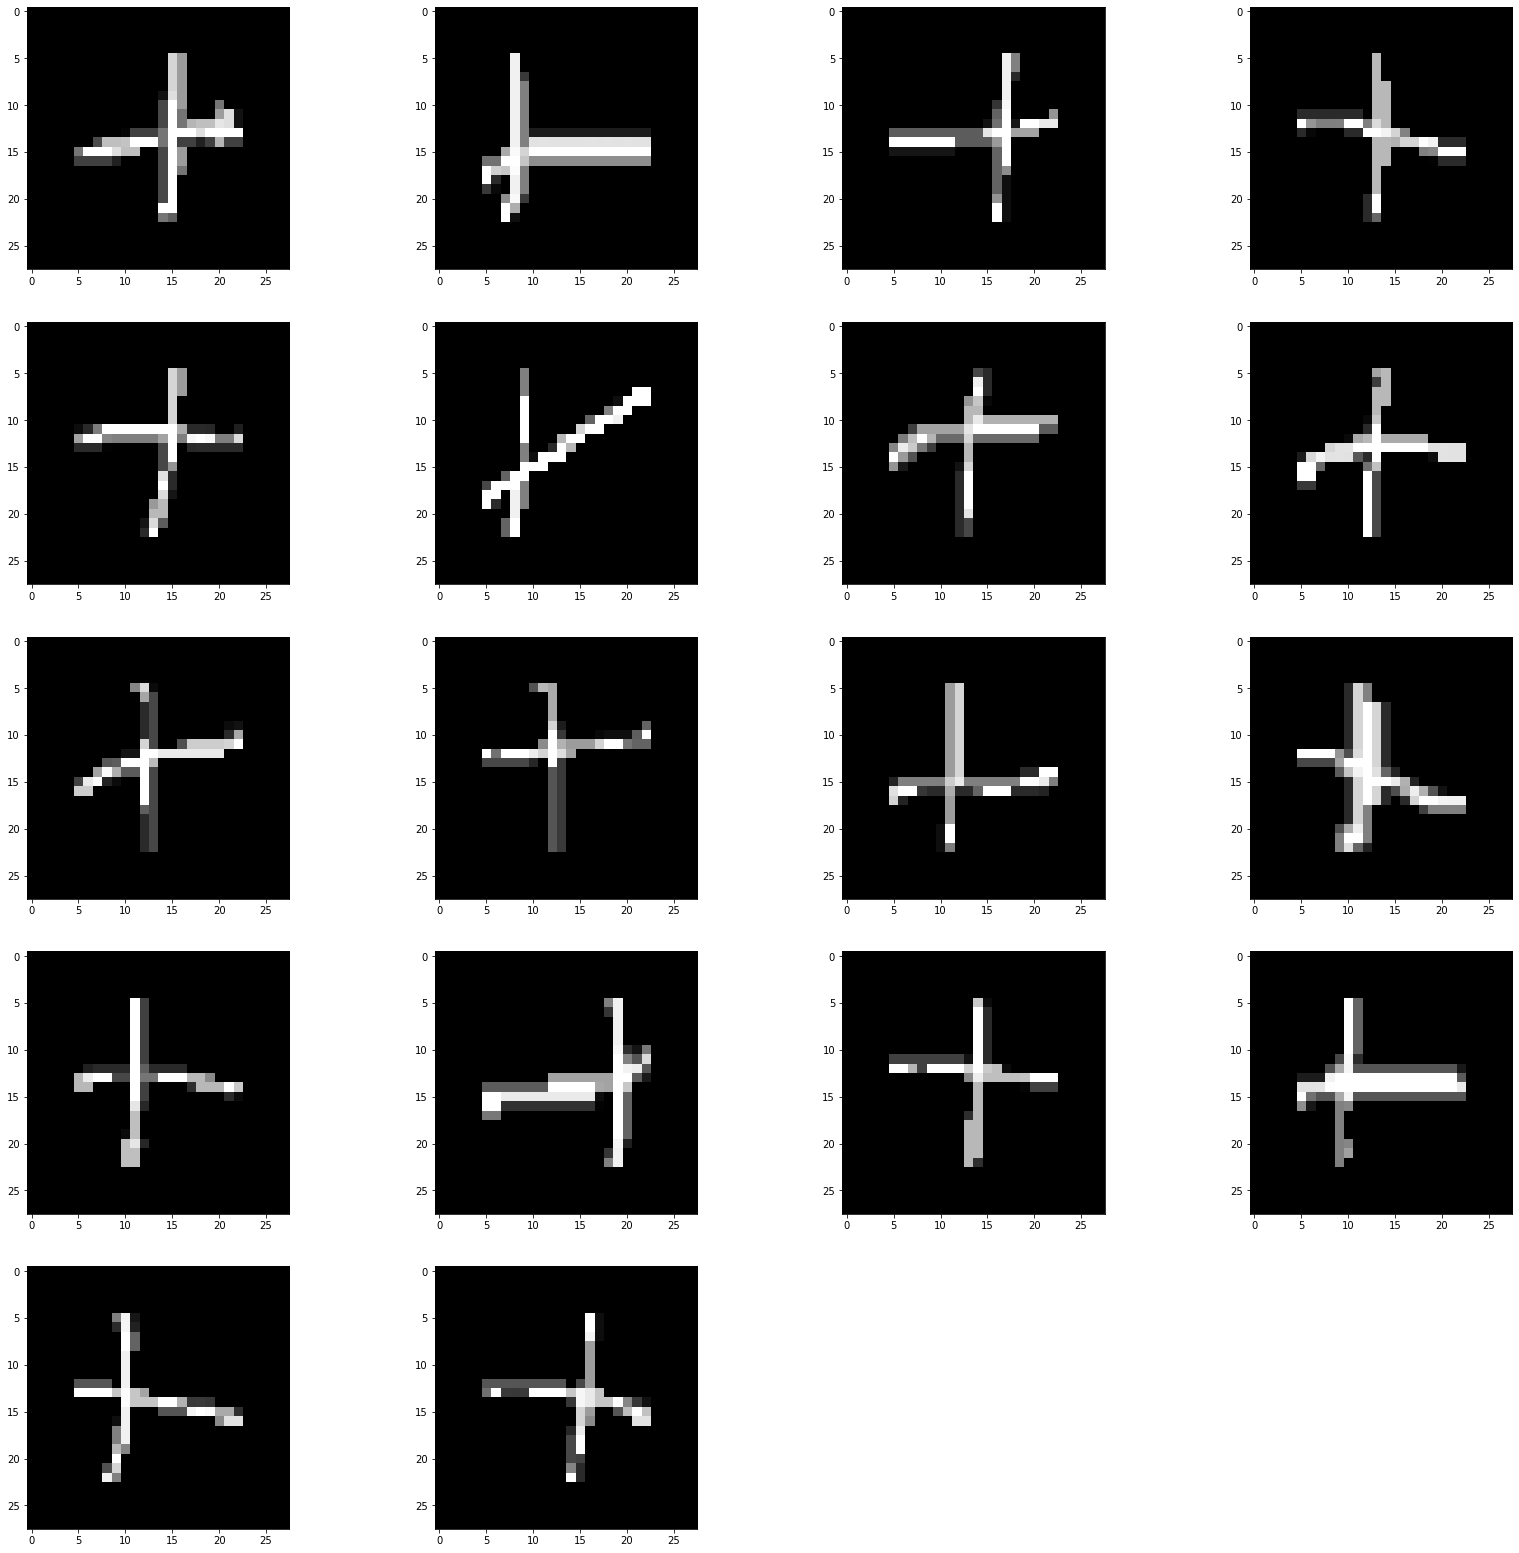

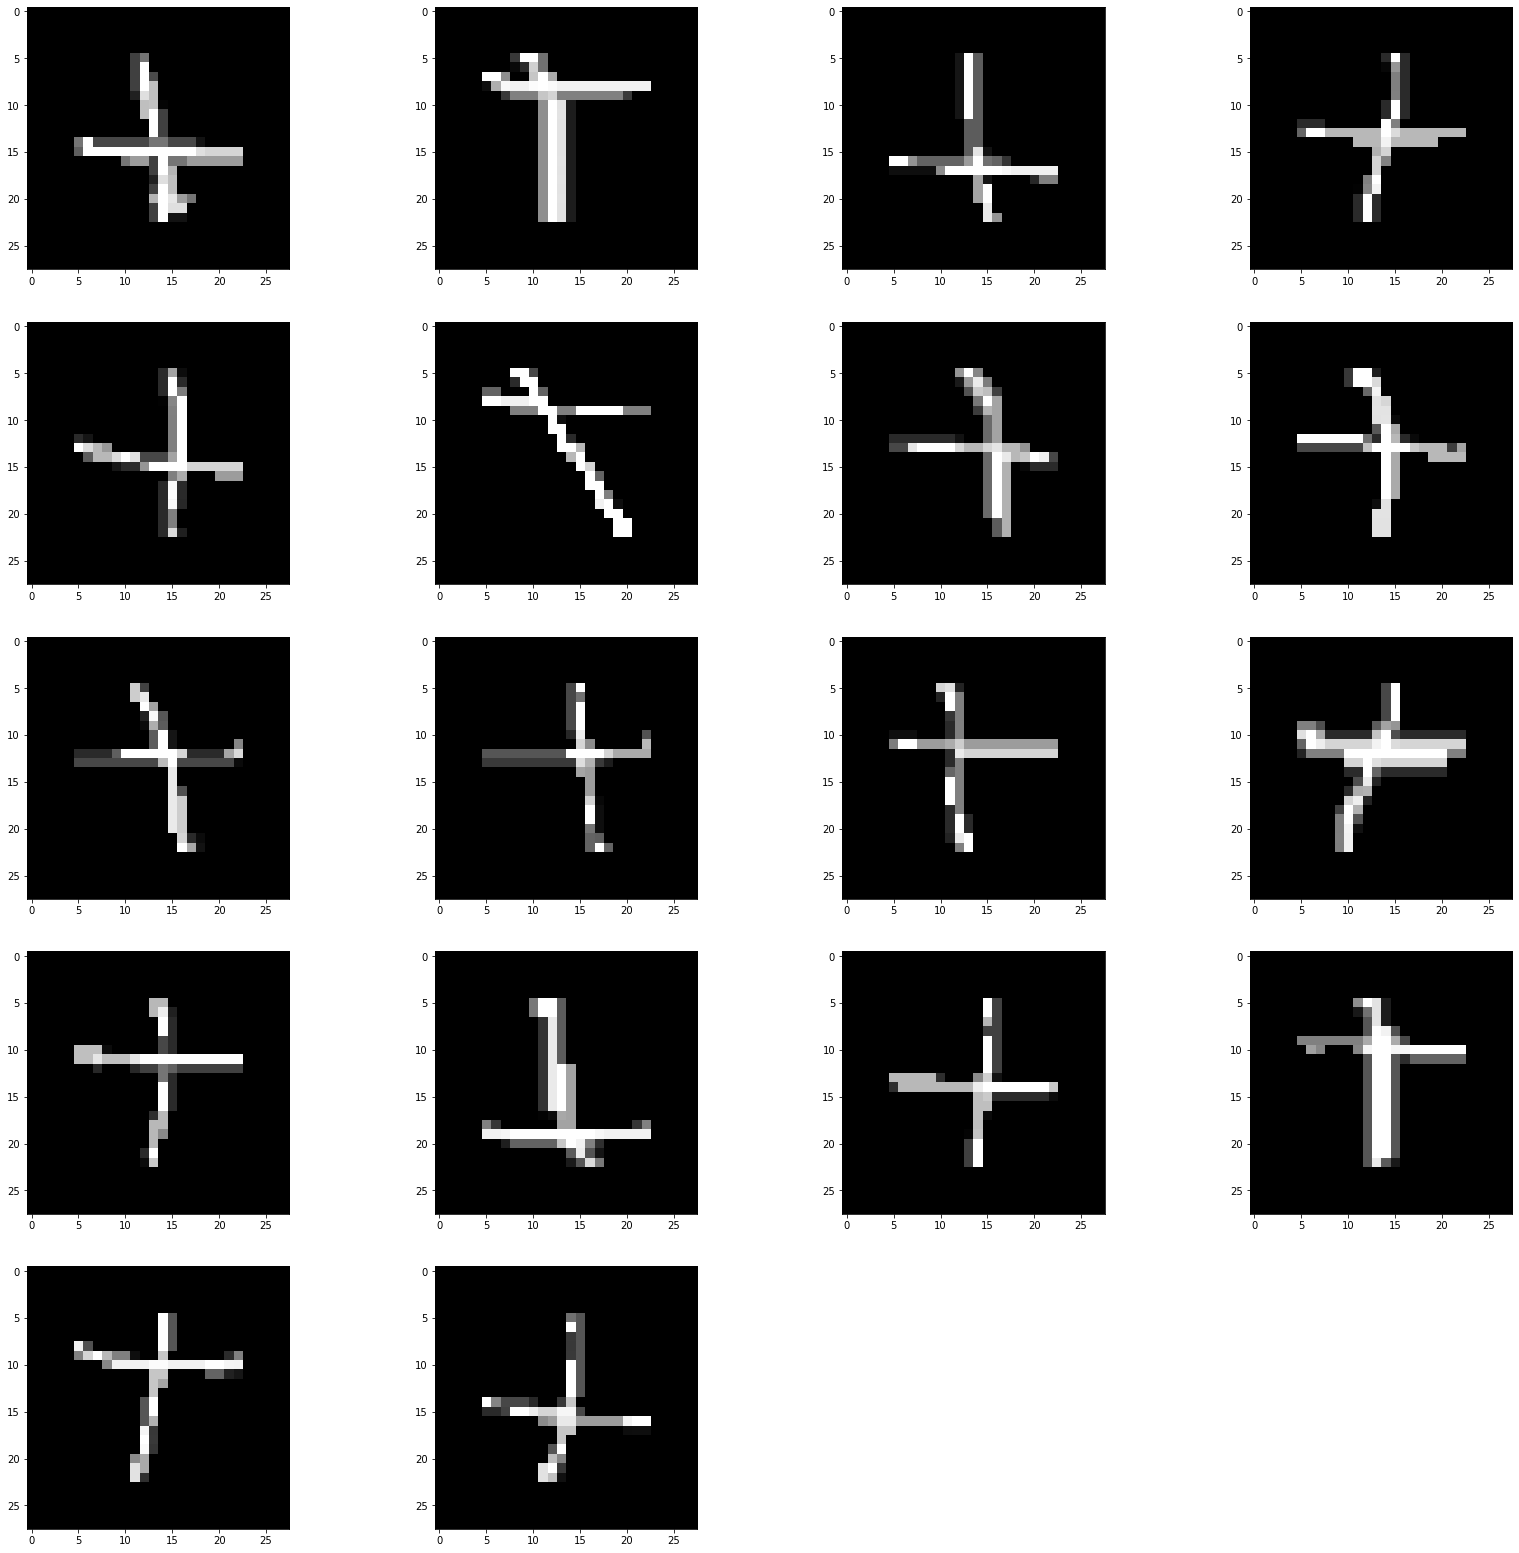

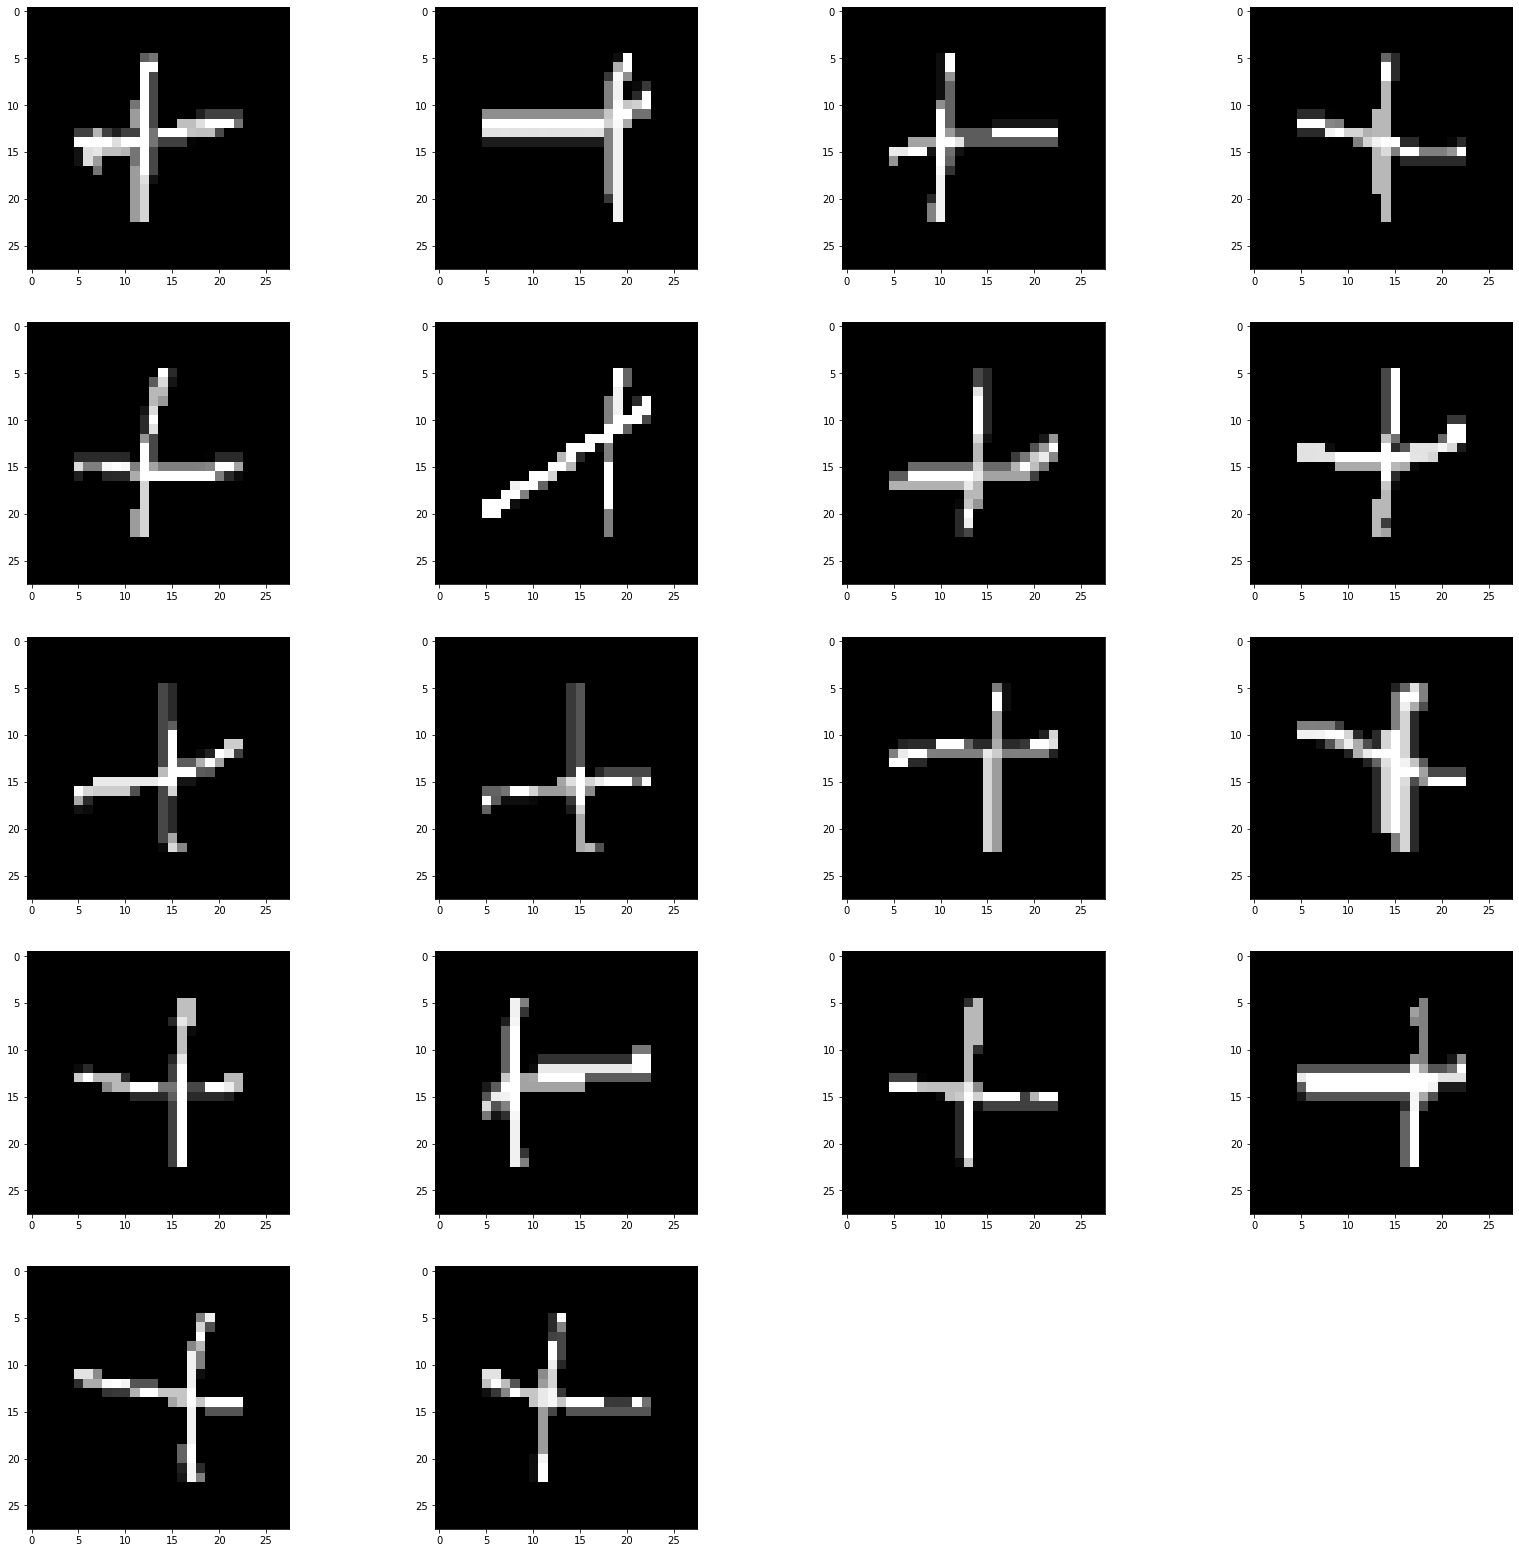

In [21]:
import os
import cv2
import math
import os
import numpy as np
import matplotlib.pyplot as plt

# Copy from before
def display_list_of_images(images_list):
  columns = 4

  # if less than 10 images doesn't seem to print correctly
  rows = math.ceil( len(images_list) / columns)

  fig = plt.figure(figsize=(28, 28))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')


# Save list of images to a specific folder
# DOUBLE CHECK THIS METHOD BEFORE RUNNING AGAIN
# maybe do read, rotate save images
def read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):

  image_file_names = os.listdir(images_folder)

  # Create string of rotation to add to file name
  rotatation_str = ""
  if (rotation == 0):
    rotatation_str = "_c90"
  elif (rotation == 1):
      rotatation_str = "_c180"
  elif (rotation == 2):
      rotatation_str = "_c270"

  # Store 'num_digits_return' to return
  rotated_digits = []

  for i in range(0,len(image_file_names)):

    image = cv2.imread(images_folder+ image_file_names[i])

    # 'rotation' expected is a cv2 rotation which is an int 0-2
    # 0 is clockwise 90 degrees, 1 is 180, 2 is 90 counter clockwise
    rotated_img = cv2.rotate(image, rotation)

    if ( i < num_digits_return):
      rotated_digits.append(rotated_img)

    # Save image as its name plus how its rotated:
    # Remove file type from img name
    image_name = os.path.splitext(image_file_names[i])

    cv2.imwrite(save_path + image_name[0] + rotatation_str +".png", rotated_img)

  if (num_digits_return !=0 ):
    return rotated_digits



# @@@@@@@@@@@@@@@@@@@@@@@@  MAIN  @@@@@@@@@@@@@@@@@@@@@@@@

# @TODO WHY IS IT ONLY DISPLAYING 20 DIGITS, DEBATE NEW PRINTING FORMAT

# @TODO Could make this into a list to reduce repititions:
# rotatations_list = []

# def read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
saved_images = read_rotate_save_images("./kaggle_dataset2/digit_original/",
   "./kaggle_dataset2/+_preproc_duplicated/",
    cv2.ROTATE_90_CLOCKWISE, 20)
  

# Display 20 saved images
print(f"DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS")
display_list_of_images(saved_images)

saved_images = read_rotate_save_images("./kaggle_dataset2/digit_original/",
   "./kaggle_dataset2/+_preproc_duplicated/",
    cv2.ROTATE_180, 20)

# Display 20 saved images
print(f"DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS")
display_list_of_images(saved_images)


saved_images = read_rotate_save_images("./kaggle_dataset2/digit_original/",
   "./kaggle_dataset2/+_preproc_duplicated/",
    cv2.ROTATE_90_COUNTERCLOCKWISE, 20)

# Display 20 saved images
print(f"DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS")
display_list_of_images(saved_images)


# Copy the original preprocessed digits into the newly created folder:
image_names = os.listdir("./kaggle_dataset2/digit_original")
for i in range(0,len(image_names)):
  image = cv2.imread("./kaggle_dataset2/digit_original/" + image_names[i])

  cv2.imwrite("./kaggle_dataset2/+_preproc_duplicated/" + image_names[i], image)

# Protability Testing New Dataset with MNIST

In [3]:
from tensorflow import keras
import cv2


# @brief Generate data subsets for neural net model.
def create_mnist_train_test():
  # number of images, 28x28 pixels
  # Shape: X:(60000, 28, 28), Y:(10000, 28, 28)
  (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

  # Create validation set and convert to float in 0-1 range
  X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
  y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
  X_test = X_test / 255.

  return X_train,  X_valid, X_test, y_train, y_valid, y_test


### MAIN ###
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# '0' parameter loads the color scale with image
# Converts it to the shape of mnist (28, 28, 3) -> (28, 28)
image = cv2.imread('./kaggle_dataset/add_preproc_duplicated/23.jpg', 0)

print(image.shape)

print(X_train_full[0].shape)



2022-12-10 23:08:10.958575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(28, 28)
(28, 28)


In [7]:
# Creating labels for our new dataset:

# @TODO Make enough "+" strings for all new images to be added to dataset

image_names_duplitcated = os.listdir("./kaggle_dataset/add_preproc_duplicated/")

y_add_plus = ["+" for img in range(len(image_names_duplitcated))]

print(len(y_add_plus))
print(len(image_names_duplitcated))

#Before converting
print("import mnist: ", y_train_full)

# Convering mnist dataset from numpy.uint8 to string
y_train_str = y_train_full.astype(str)

print("mnist converted to string: ", y_train_str)

# print(y_train_str)



2265
2265
import mnist:  [5 0 4 ... 5 6 8]
mnist converted to string:  ['5' '0' '4' ... '5' '6' '8']


In [ ]:

# @TODO clean all code make better named folders and a central location